Epoch	Weights	Bias	Error
1	[0.2771 0.7912 0.1566 0.6533]	0.1702	4.7204
2	[0.2549 0.7685 0.1367 0.6297]	0.1362	4.0182
3	[0.235  0.748  0.1191 0.6084]	0.1057	3.4529
4	[0.2171 0.7295 0.1035 0.5891]	0.0784	2.9977
5	[0.201  0.7129 0.0897 0.5716]	0.0539	2.6312
6	[0.1867 0.698  0.0775 0.5558]	0.0319	2.3361
7	[0.1737 0.6845 0.0668 0.5414]	0.0122	2.0984
8	[0.1622 0.6724 0.0574 0.5283]	-0.0055	1.9070
9	[0.1518 0.6614 0.0492 0.5164]	-0.0213	1.7527
10	[0.1425 0.6516 0.042  0.5055]	-0.0356	1.6284
11	[0.1341 0.6427 0.0358 0.4956]	-0.0483	1.5281
12	[0.1266 0.6346 0.0304 0.4866]	-0.0597	1.4472
13	[0.1199 0.6273 0.0258 0.4783]	-0.0700	1.3819
14	[0.1138 0.6207 0.0218 0.4707]	-0.0791	1.3292
15	[0.1084 0.6148 0.0185 0.4637]	-0.0873	1.2865
16	[0.1036 0.6094 0.0157 0.4573]	-0.0947	1.2520
17	[0.0992 0.6045 0.0134 0.4513]	-0.1013	1.2240
18	[0.0953 0.6    0.0115 0.4458]	-0.1072	1.2013
19	[0.0918 0.596  0.01   0.4407]	-0.1125	1.1827
20	[0.0886 0.5923 0.0089 0.436 ]	-0.1173	1.1676
21	[0.0858 0.589  0.0081 0.4316

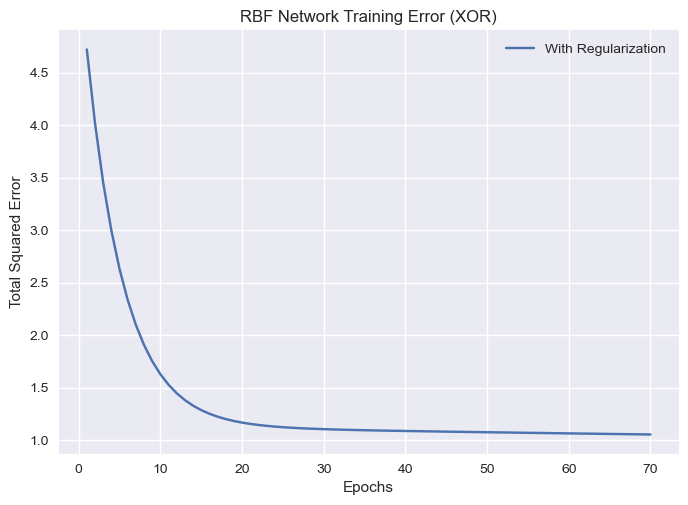

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# RBF centers = training samples
centers = X.copy()

# Initialize weights randomly (one per center) + bias
wts = np.random.rand(len(centers))
bias = np.random.rand()

lr = 0.01
epochs = 70
lambda_reg = 0.01   # regularization strength
errors = []

def gaussian(x, c, sigma=1.0):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

print("Epoch\tWeights\tBias\tError")

for epoch in range(epochs):
    total_error = 0
    
    for i in range(len(X)):
        # Compute activations for all centers
        phis = np.array([gaussian(X[i], c) for c in centers])
        
        # Network output
        y_pred = np.dot(wts, phis) + bias
        
        # Error
        error = y[i] - y_pred
        total_error += error**2
        
        # Update weights and bias with regularization
        wts += lr * (error * phis - lambda_reg * wts)
        bias += lr * error
    
    errors.append(total_error)
    print(f"{epoch+1}\t{wts.round(4)}\t{bias:.4f}\t{total_error:.4f}")
    
    # Stop early if error is very small
    if total_error < 1e-6:
        break

# Plot error curve
plt.plot(range(1, len(errors)+1), errors, label="With Regularization")
plt.xlabel("Epochs")
plt.ylabel("Total Squared Error")
plt.title("RBF Network Training Error (XOR)")
plt.legend()
plt.show()